In [31]:
from ising.lattices import square_random_lattice
from ising.checkerboard import *
from ising.visualize import (
    lattices_to_images,
    upscale_lattices,
    display_experiment,
    save_gif,
)
import matplotlib.pyplot as plt
import numpy as np
import ising.plot_styling

In [32]:
N, M = 50, 50
lattice = square_random_lattice(N, M, states=[-1, 1])

We start by examining the case where h = 0. 
This is the one that needs to be compared to the analytical results

In [33]:
h_J = 0

In [34]:
def magnetization(lattice, h_J):
    t1, t2, t3 = 2, 5, 3
    t_low = np.linspace(00.1, 2, t1)
    t_high = np.linspace(3, 10, t2)
    t_transition = np.linspace(2, 3, t3)

    magnetization = np.empty(t1+t2+t3)
    i = 0

    Ts = np.concatenate( (t_low, t_transition, t_high) )

    for T in Ts:

        magnetization[i] = np.average(
                simulate(lattice.copy(), h_J=h_J, T=T, steps=1_000),
        )

        i += 1

    return (Ts, magnetization)

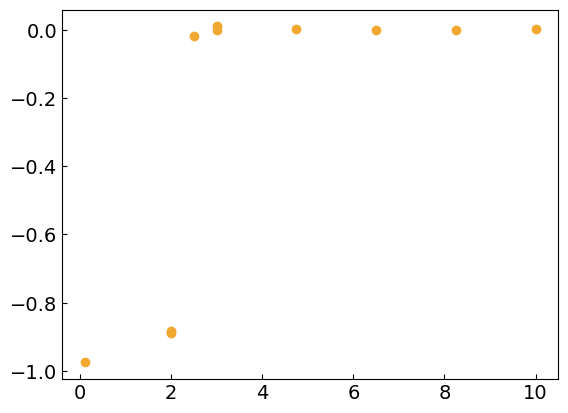

In [35]:
Ts, mag = magnetization(lattice, h_J=0)
plt.scatter(Ts, mag)

In [36]:
import matplotlib.pyplot as plt




# def magnetization_derivative(magnetization: np.array):
#     """Compute the numerical derivative of the magnetization array.
#     Note that the accompanying 'x' array is equispaced and in particular
#     the separation is 1 between consequtive points."""

#     return np.gradient(magnetization)


def average_upto_index(array: np.array) -> np.array:
    """Returns an array where each element i is equal to the
    average value of the subarray indexed by [:i+1]."""

    return np.cumsum(array) / np.arange(1, len(array) + 1)


def magnetization_from_lattices(lattices: Lattices) -> np.array:
    """Computes the magnetization for each state
    from an array of lattices."""

    return np.average(lattices, axis=(1, 2))


def characterize_convergence(lattice, h_J, T, steps) -> np.array:
    """Evolve the lattice until a stable value for the magnetization is reached.
    Returns the magnetization during the simulation."""

    _lattices = simulate(lattice.copy(), h_J=h_J, T=T, steps=steps)


    _magnetization = magnetization_from_lattices(_lattices)
    magnetization = _magnetization.copy()


    indices = np.arange(steps)
    plt.plot(indices, magnetization)
    plt.plot(indices, average_upto_index(magnetization))

    return magnetization

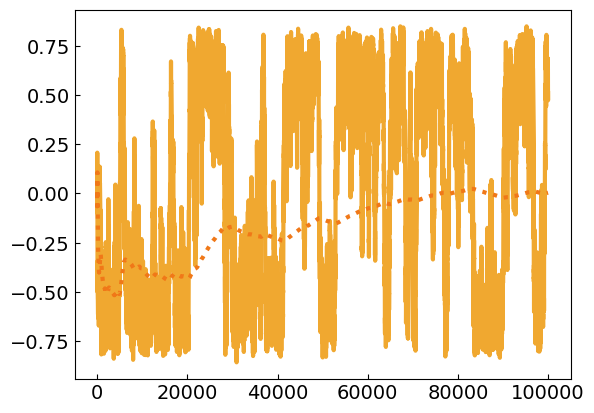

In [37]:
mag = characterize_convergence(lattice, h_J=0, T=2.3, steps=100_000)

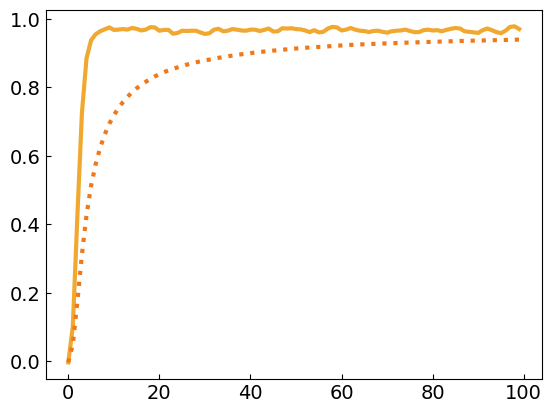

In [38]:
mag2 = characterize_convergence(lattice, h_J=1, T=2.3, steps=100)

In [48]:
print(np.var(average_upto_index(mag)[:100_000])/np.var(mag))
print(np.var(average_upto_index(mag2)[20:])/np.var(mag2))

0.09122817022547695
0.033551519968548556
